### Detail
- paper [here](http://ydwen.github.io/papers/WenECCV16.pdf)
- not just separate but discriminate 
- softmax loss = cross entrophy
- dataset MegaFace also [Labeled Faces in the Wild (LFW), and YouTube Faces (YTF)]
- use 5 landmarks (two eyes, nose and mouth corners) for similarity transformation by this [algorithm](https://arxiv.org/pdf/1604.02878.pdf)
- cropped to 112 × 96

TODO
- pretrain with softmax loss
- MTCNN to face align
- freeze/unfreeze
- 

In [1]:
import torch
t = torch.tensor([[10,20],
                  [30,40]])
torch.gather(t, 0, torch.tensor([[0, 0],
                                 [1, 1]]))

tensor([[10, 20],
        [30, 40]])

In [2]:
import numpy as np
np.unique(np.array([1,2,3,1,2,2]), return_inverse=True, return_counts=True)

(array([1, 2, 3]), array([0, 1, 2, 0, 1, 1]), array([2, 3, 1]))

In [3]:
%reload_ext autoreload
%autoreload 2
from torchvision import transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from exitai.learner import Learner
from sklearn.decomposition import PCA
import numpy as np

In [4]:
transform_train = transforms.Compose([
                                   transforms.RandomAffine(15, scale=(.9,1.2)),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,), (1,))
                               ])
transform_test = transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,), (1,))
                               ])
dataset_train = datasets.MNIST(root='../../data/', train=True, download=True, transform=transform_train)
dataset_test = datasets.MNIST(root='../../data/', train=True, download=True, transform=transform_train)
data_loader_train = DataLoader(dataset_train, batch_size=128, shuffle=True, num_workers=8)
data_loader_test = DataLoader(dataset_test, batch_size=128, shuffle=True, num_workers=8)

In [12]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 20, 5, 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(20, 50, 5, 1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, 2),
        )
        self.fc = nn.Sequential(
            nn.Linear(4*4*50, 500),
            nn.Linear(500, 10)
        )
        self.is_classification = True
        
    def forward(self, x):
        output = self.cnn(x)
        vector_embedded = output.view(-1, 50*4*4)
        output = self.fc(vector_embedded)
        return output, vector_embedded
    
    def name(self):
        return "LeNet"

In [13]:
criterion = nn.CrossEntropyLoss()
def model_loss_func(input_data, model, phase):
    input, target = input_data
    output, _ = model(input)
    return output, criterion(output, target)

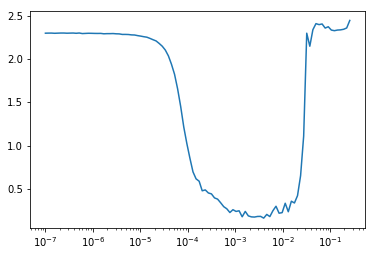

In [10]:
model = LeNet()
learner = Learner(data_loader_train, data_loader_test, model)
learner.lr_find(model_loss_func, 1e-7, 0.3)

In [40]:
model = LeNet()
learner = Learner(data_loader_train, data_loader_test, model)
learner.fit(model_loss_func, 0.002, num_epochs=1)

---- epoch:0 ------
   [train] Average loss: 0.1327, acc: 94.71%
   [test] Average loss: 0.0461, acc: 98.21%


In [73]:
target, vector_embedded
classes_data = np.array([[],[],[]])
target = np.array([1,3,2])-1
data = np.array([
    [11,11,11],
    [31,31,31],
    [21,21,21]
])
np.concatenate((classes_data[target], data))
classes_data[target]

# for data in data_loader_test:
#     print(data[1])
#     break

array([], shape=(3, 0), dtype=float64)

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [32]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(3, 3), rng.randn(3, 200)).T
# plt.scatter(X[:, 0], X[:, 1])
# plt.axis('equal');

In [33]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

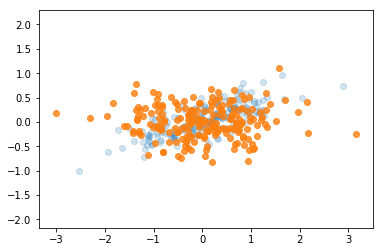

In [34]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.axis('equal');